# Exercise 1

9
9


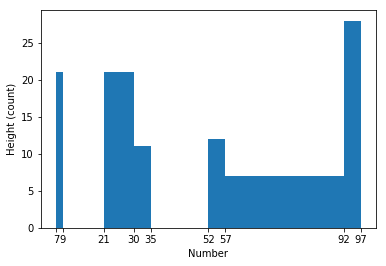

[7, 9, 21, 30, 35, 52, 57, 92, 97]
[21, 0, 21, 11, 0, 12, 7, 6, 22]


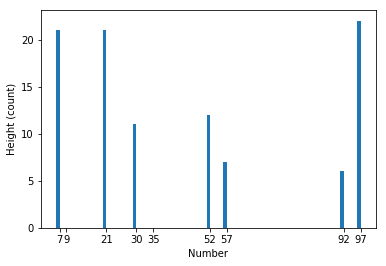

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# this plots inline graph in jupyter notebook
%matplotlib inline

# select the number k randomly from [5, 10]
k = np.random.randint(5, 11)
numbers = []
prob = []

# generates K random numbers between [0, 100) and assign random probability between [0, 1)
for i in range(0, k):
    numbers.append(np.random.randint(0, 100))
    prob.append(np.random.uniform(0, 1))

# normalize probability using numpy array
# e.g. normalize [0. 8, 0.9, 0.2, 0.1] to [0.4, 0.45, 0.1, 0.05]
# so total probability sum is 1
prob = np.array(prob)
numbers = np.array(numbers)
total = prob.sum()
prob /= total

print(k)
print(len(numbers))

# select 100 numbers with the given probability
# will use this as indices
# e.g. b will be [0, 2, 4, 5, ..., 1]
# and if randomly chosen numbers are [10, 12, 45, 56, 14, 79]
# then final selcted numbers will be
# [numbers[0], numbers[2], numbers[4], numbers[5], ..., numbers[1]]
# = [10, 45, 14, 79, ..., 12]
b = np.random.choice(k, 100, p=prob)
number_l = numbers[b]


#sort numbers
numbers = sorted(numbers)
#plot histogram
plt.hist(number_l, bins=numbers)
# show number ticked on x - axis
plt.xticks(sorted(numbers), sorted(numbers))
# add xlabel to graph
plt.xlabel('Number')
# add label to y axis on graph
plt.ylabel('Height (count)')
# show plotted graph
plt.show()

# count number of times each number is selected
number_count = []
for i in range(0, k):
    number_count.append((number_l == numbers[i]).sum())
print(numbers)
print(number_count)

# plots a bar graph as numbers on x axis and count as height with width = 1
plt.bar(numbers, height=number_count, width=1)
# ticks number on x axis
plt.xticks(np.array(numbers)+0.5, numbers)
# add xlabel to graph
plt.xlabel('Number')
# add label to y axis on graph
plt.ylabel('Height (count)')
plt.show()

# Excercise 2

In [3]:
import urllib.request
from bs4 import BeautifulSoup
import re

# load html page from url
page = urllib.request.urlopen('https://en.wikipedia.org/wiki/Python_(programming_language)')
# make soup object of html page
soup = BeautifulSoup(page)

############## section 1 ############
# find a <table> with class "infobox vevent". Because that's the table which contains the desired data
# then, from the 3rd <tr> tag and extract text of <td> tag
designed_by = soup.body.find('table', attrs={'class' : 'infobox vevent'}).findAll('tr')[2].find('td').text
print(designed_by)


############### section 2 ################
# find a <div> with class "mw-parser-output" (it contain history session)
data = soup.body.find('div', attrs={'class' : 'mw-parser-output'})
# find all <p> child of data
data_p = data.findAll('p')
d = ""
# extract text from 5th <p> tag to 9th <p> tag. Only these <p> tags
# are under history session.
for i in range(5, 10):
    # concate text of <p> tag into d
    d += data_p[i].text

# find a <table> with class = cquote and extract text from it
d += data.find('table', attrs={'class' : 'cquote'}).text

# print(d)

# list of words/characters to remove
remove = ['(', ')', '[', ']', '...', ',', '.', '“', '”', '&']
# convert texts into lowercase
d.lower()

# remove each word/character from the list remove and 
# replace it with a blank space
for ch in remove:
    d = d.replace(ch, ' ')

# convert it into list by spliting it by blank space
d = d.split()
# create a set to get unique words only
a = set(d)
# print(a)
# len of this set is equal to number of unique words
print(len(a))


##################### section 3  ###############
# find a <table> with class "infobox vevent", get 18th <tr> tag and extract text from it 
influenced_by = soup.body.find('table', attrs={'class' : 'infobox vevent'}).findAll('tr')[17].text
# replace reference number with blank space e.g.: [18] -> " ", [19] -> " "
influenced_by = re.sub("\[\d+\] | \d+", " ", influenced_by)
# split it by "," and get the length of the list. That's the number of language 
# influenced by python
print(len(influenced_by.split(',')))



/home/jupyterlab/conda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/jupyterlab/conda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Guido van Rossum
219
12
